https://pysolar.readthedocs.io/en/latest/#location-calculation

In [1]:
import inspect
from importlib import reload

In [2]:
import numpy as N
import matplotlib
import matplotlib.pyplot as M
import matplotlib.ticker as ticker

In [3]:
matplotlib.rcParams['figure.figsize'] = [6,6]
matplotlib.rcParams.update({'font.size': 16})
pngdpi=150

In [5]:
import analemma as A

In [6]:
reload(A)

<module 'analemma' from '/Users/apope/Dropbox/Python/analemma/apope/analemma.py'>

In [7]:
print(inspect.getsource(A))

import pysolar.solar as PS
import datetime as DT
import numpy as N

class Analemma:
    def __init__(self, latitude=41.1190631, longitude=-83.2225659, offsetHoursUTC=-5.0, year=2021):
        # defaults to EST in Tiffin, OH, USA for 2021
        self.lat = latitude
        self.lon = longitude
        hour = DT.timedelta(hours=1.0)
        self.td = offsetHoursUTC*hour
        self.dayZero = DT.datetime(year, 1, 1, tzinfo=DT.timezone.utc)
        
    def getTimeFromLocal(self, dayOfYear, localStandardTimeHours24):
        # generate UTC datetime object from local day and time
        # day is meant to be integer, should check that
        # local time is floating point
        day = DT.timedelta(days=1)
        hour = DT.timedelta(hours=1)
        time = self.dayZero + int(dayOfYear)*day + localStandardTimeHours24*hour - self.td
        return time
    
    def getAltAz(self, dayOfYear, localStandardTimeHours24):
        # (alt, az) tuple from scalar local day and time
        time = 

Instantiate Analemma object for Tiffin, OH, USA, in Eastern Standard Time for 2021

In [10]:
a = A.Analemma()

In [26]:
a.dayZero.year

2021

In [12]:
print(a.getAltAz(0,9))
print(a.getAltAz(0,16))

(8.725269672026311, 130.9910881369779)
(10.575080240627738, 226.5667998242674)


Plot Sun's azimuth and altitude in degrees for 00:00 to 23:00 EST on 4 days of the year, negative altitudes indicate that the Sun is below the horizon.

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


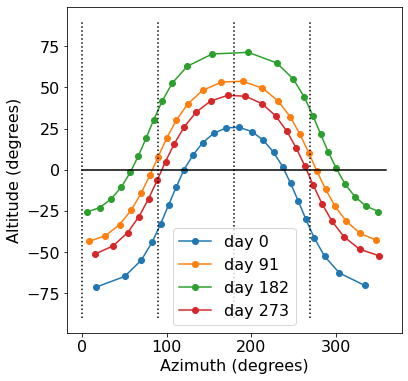

In [13]:
start = 1
stop = 25
incr = 1
for day in [0,91,182,273]:
    times = a.fixedDay(day,range(start,stop,incr))
    M.plot(a.getAzimuths(times),a.getAltitudes(times),'-o',label=('day %s'%day));
M.legend();
M.xlabel('Azimuth (degrees)');
M.ylabel('Altitude (degrees)');
M.plot([0,360],[0,0],'k');
M.plot([0,0],[-90,90],':k');
M.plot([90,90],[-90,90],':k');
M.plot([180,180],[-90,90],':k');
M.plot([270,270],[-90,90],':k');

Plot Sun's shadow on flat level ground from 09:00 to 16:00 EST on same 4 days. The shadow casting object is placed at (0,0) and has a dimensionless height equal to one, so one can multiply the dimensionless distances on the ground by the measured height of the shadow casting object in some units to get ground distances in the same units. East is positive on the x/ordinate axis, North is positive on the y/coordinate axis. The time range was chosen to be during daylight all of the year.

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


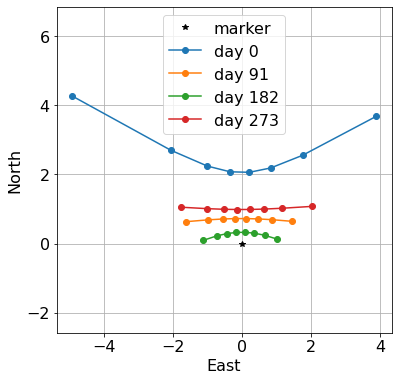

In [21]:
start = 9
stop = 17
incr = 1
M.plot(0,0,'*k',label='marker');
for day in [0,91,182,273]:
    times = a.fixedDay(day,range(start,stop,incr))
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times))
    M.plot(east,north,'-o',label=('day %s'%day));
M.xlabel('East');
M.ylabel('North');
M.grid(True);
M.gca().set_aspect('equal', 'datalim');
M.legend();
M.show();

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


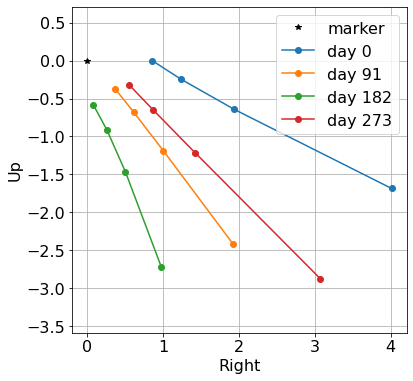

In [22]:
azWall = -10.0
start = 8
stop = 12
incr = 1
M.plot(0,0,'*k',label='marker');
for day in [0,91,182,273]:
    times = a.fixedDay(day,range(start,stop,incr))
    right,up = a.shadowWallRightUp(a.getAltitudes(times),a.getAzimuths(times),azWall)
    M.plot(right,up,'-o',label=('day %s'%day));
M.xlabel('Right');
M.ylabel('Up');
M.grid(True);
M.gca().set_aspect('equal', 'datalim');
M.legend();
M.show();

Plot an annual analemma on the sky at three fixed times per day, positions determined every 14 days. It turns out local noon in Tiffin is close to 12:36pm, which makes sense since it's west in its time zone.

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


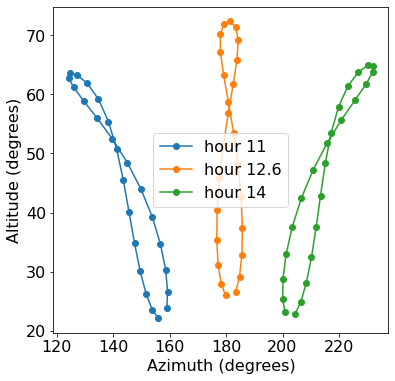

In [16]:
start = 0
stop = 350
incr = 14
for tod in [11,12.6,14]:
    times = a.fixedTime(tod,range(start,stop,incr))
    M.plot(a.getAzimuths(times),a.getAltitudes(times),'-o',label='hour %s'%tod);
M.legend();
M.xlabel('Azimuth (degrees)');
M.ylabel('Altitude (degrees)');

Plot an annual analemma on flat level ground at three fixed times per day, positions determined every 14 days. The shadow casting object is placed at (0,0) and has a dimensionless height equal to one, so one can multiply the dimensionless distances on the ground by the measured height of the shadow casting object in some units to get ground distances in the same units. East is positive on the x/ordinate axis, North is positive on the y/coordinate axis.

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


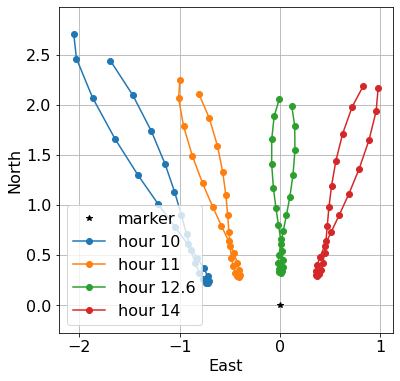

In [19]:
start = 0
stop = 350
incr = 14
M.plot(0,0,'*k',label='marker');
for tod in [10,11,12.6,14]:
    times = a.fixedTime(tod,range(start,stop,incr))
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times))
    M.plot(east,north,'-o',label=('hour %s'%tod));
M.xlabel('East');
M.ylabel('North');
M.grid(True);
M.gca().set_aspect('equal', 'datalim');
M.legend();
M.show();

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


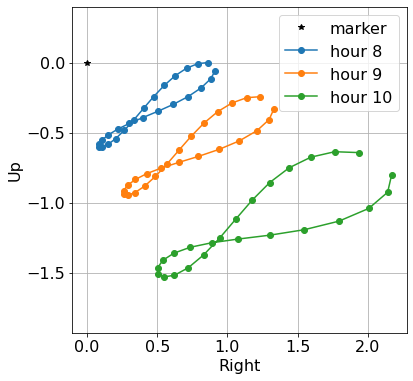

In [20]:
azWall = -10.0
start = 0
stop = 350
incr = 14
M.plot(0,0,'*k',label='marker');
for tod in [8,9,10]:
    times = a.fixedTime(tod,range(start,stop,incr))
    right, up = a.shadowWallRightUp(a.getAltitudes(times),a.getAzimuths(times),azWall)
    M.plot(right,up,'-o',label=('hour %s'%tod));
M.xlabel('Right');
M.ylabel('Up');
M.grid(True);
M.gca().set_aspect('equal', 'datalim');
M.legend();
M.show();

Tiffin: latitude=41.1190631, longitude=-83.2225659, offsetHoursUTC=-5.0, year=2021

Kailua: latitude=21.3975, longitude=-157.739444, offsetHoursUTC=-10.0, year=2022

Seattle: latitude=47.609722, longitude=-122.333056, offsetHoursUTC=-8.0, year=2022

In [14]:
b = A.Analemma(latitude=21.3975, longitude=-157.739444, offsetHoursUTC=-10.0, year=2022)

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \


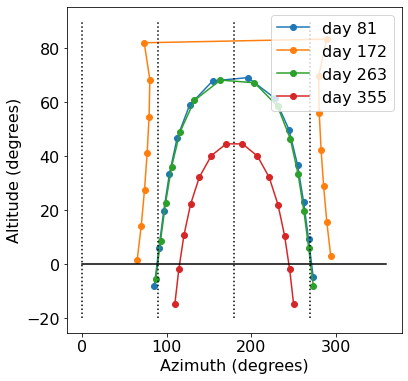

In [37]:
ana = b
start = 6
stop = 20
incr = 1
ymin = -20
ymax = 90
for day in [81,172,263,355]:
    times = ana.fixedDay(day,N.arange(start,stop,incr))
    M.plot(ana.getAzimuths(times),ana.getAltitudes(times),'-o',label=('day %s'%day));
M.legend();
M.xlabel('Azimuth (degrees)');
M.ylabel('Altitude (degrees)');
M.plot([0,360],[0,0],'k');
M.plot([0,0],[ymin,ymax],':k');
M.plot([90,90],[ymin,ymax],':k');
M.plot([180,180],[ymin,ymax],':k');
M.plot([270,270],[ymin,ymax],':k');
M.show();

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \


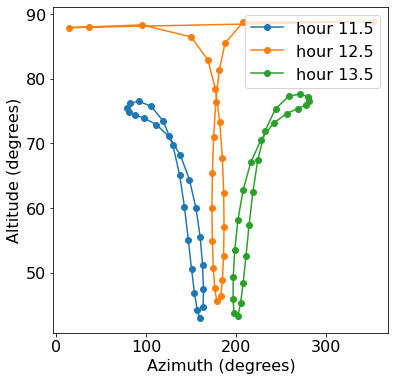

In [36]:
ana = b
start = 0
stop = 350
incr = 14
for tod in [11.5,12.5,13.5]:
    times = ana.fixedTime(tod,range(start,stop,incr))
    M.plot(ana.getAzimuths(times),ana.getAltitudes(times),'-o',label='hour %s'%tod);
M.legend();
M.xlabel('Azimuth (degrees)');
M.ylabel('Altitude (degrees)');
M.show();

In [40]:
c = A.Analemma(latitude=47.609722, longitude=-122.333056, offsetHoursUTC=-8.0, year=2022)

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \


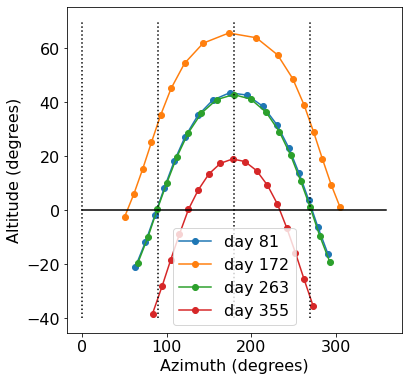

In [44]:
ana = c
start = 4
stop = 21
incr = 1
ymin = -40
ymax = 70
for day in [81,172,263,355]:
    times = ana.fixedDay(day,N.arange(start,stop,incr))
    M.plot(ana.getAzimuths(times),ana.getAltitudes(times),'-o',label=('day %s'%day));
M.legend();
M.xlabel('Azimuth (degrees)');
M.ylabel('Altitude (degrees)');
M.plot([0,360],[0,0],'k');
M.plot([0,0],[ymin,ymax],':k');
M.plot([90,90],[ymin,ymax],':k');
M.plot([180,180],[ymin,ymax],':k');
M.plot([270,270],[ymin,ymax],':k');
M.show();

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \


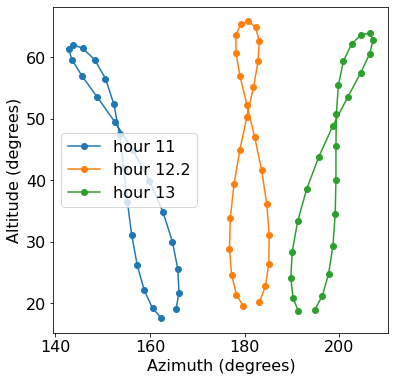

In [47]:
ana = c
start = 0
stop = 350
incr = 14
for tod in [11,12.2,13]:
    times = ana.fixedTime(tod,range(start,stop,incr))
    M.plot(ana.getAzimuths(times),ana.getAltitudes(times),'-o',label='hour %s'%tod);
M.legend();
M.xlabel('Azimuth (degrees)');
M.ylabel('Altitude (degrees)');
M.show();

In [71]:
def airmass_pp(alt):
    return 1.0/N.cos(N.pi/180*(90-alt))

In [72]:
def airmass_pickering(alt):
    return 1.0/N.sin(N.pi/180*(alt + 244 / (165 + 47*alt**1.1)))

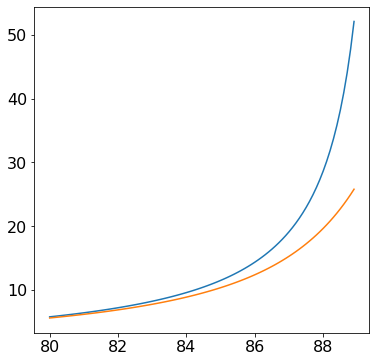

In [75]:
x = N.arange(80,89,0.1)
M.plot(x,airmass_pp(90-x))
M.plot(x,airmass_pickering(90-x))
M.show()

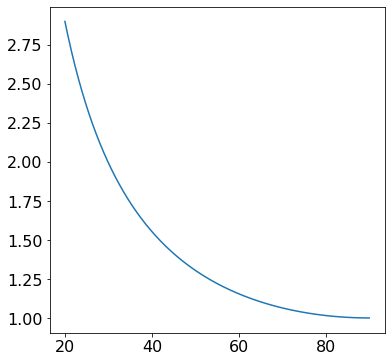

In [77]:
x = N.arange(20,90,0.1)
M.plot(x,airmass_pickering(x))
M.show()